In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ratings = pd.read_csv('dataset_small/ratings.csv')
movies = pd.read_csv('dataset_small/movies.csv')

merged = ratings.merge(movies[['movieId', 'genres']], on='movieId', how='left')

genres_encoded = merged['genres'].str.get_dummies(sep='|')
data = pd.concat([merged, genres_encoded], axis=1)
data.drop('genres', axis=1, inplace=True)

X = data.drop(columns=['rating', 'timestamp'])
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

scalers = {
    'without_scaler': None,
    'min_max': MinMaxScaler(),
    'z-score': StandardScaler()
}

regressors = {
  'knn': KNeighborsRegressor(n_neighbors=15),
  'decicion_tree': DecisionTreeRegressor(),
  'linear_regression': LinearRegression(),
  'random_forest': RandomForestRegressor(),
  'neural_network_mlp': MLPRegressor()
}

### KNN

In [2]:
n_neighbors =  [5, 7, 9, 11, 13, 15]
weights = ['distance', 'uniform']

dataframe_mse = {}
dataframe_mae = {}

for num in n_neighbors:
    for weight in weights:
        for scaler in scalers:
            if(scalers[scaler] == None):
                pipe = Pipeline([('regressor', KNeighborsRegressor(num, weights=weight))])
            else:
                pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', KNeighborsRegressor(num, weights=weight))])
            
            pipe.fit(X_train, y_train)
            y_predict = pipe.predict(X_test)
            
            mse = mean_squared_error(y_test, y_predict)
            mae = mean_absolute_error(y_test, y_predict)
            
            key = f'k_{num}-{weight}'

            if key in dataframe_mse:
                dataframe_mse[key].append(mse)
                dataframe_mae[key].append(mae)
            else:
                dataframe_mse[key] = [mse]
                dataframe_mae[key] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
k_5-distance,1.176037,1.146429,1.147998
k_5-uniform,1.153253,1.076724,1.078334
k_7-distance,1.127215,1.104393,1.105704
k_7-uniform,1.107687,1.040903,1.041978
k_9-distance,1.101593,1.081076,1.081404
k_9-uniform,1.087895,1.024273,1.024554
k_11-distance,1.085892,1.065255,1.066181
k_11-uniform,1.077182,1.013819,1.017163
k_13-distance,1.074181,1.053869,1.055416
k_13-uniform,1.069588,1.008128,1.011285


'MAE'

,without-scaler,min-max,z-score
k_5-distance,0.845902,0.828960,0.831283
k_5-uniform,0.840627,0.809917,0.811747
k_7-distance,0.830240,0.814611,0.816711
k_7-uniform,0.827048,0.797759,0.798645
k_9-distance,0.821619,0.806526,0.807756
k_9-uniform,0.820478,0.792303,0.792027
k_11-distance,0.816394,0.801011,0.802400
k_11-uniform,0.816597,0.788115,0.789480
k_13-distance,0.812278,0.796902,0.798689
k_13-uniform,0.814044,0.785837,0.787096


### Regressão Linear

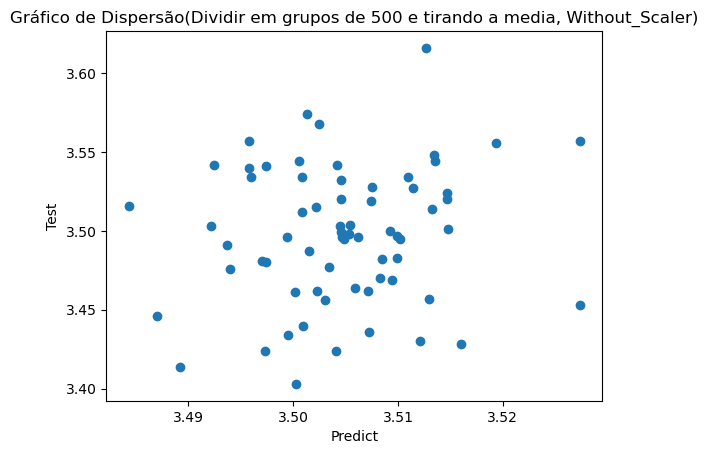

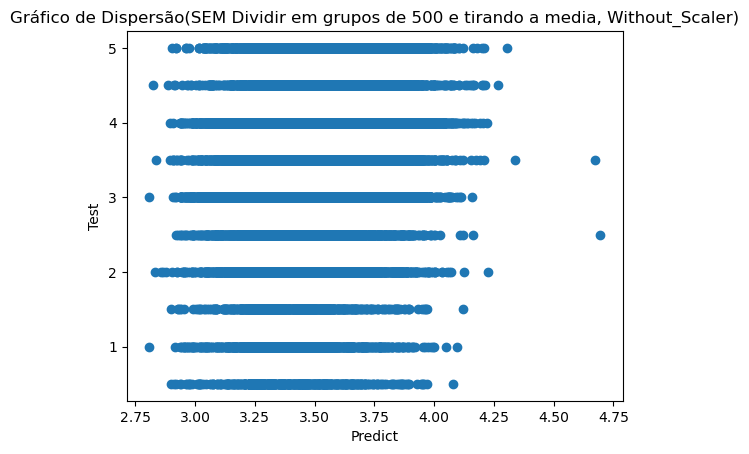

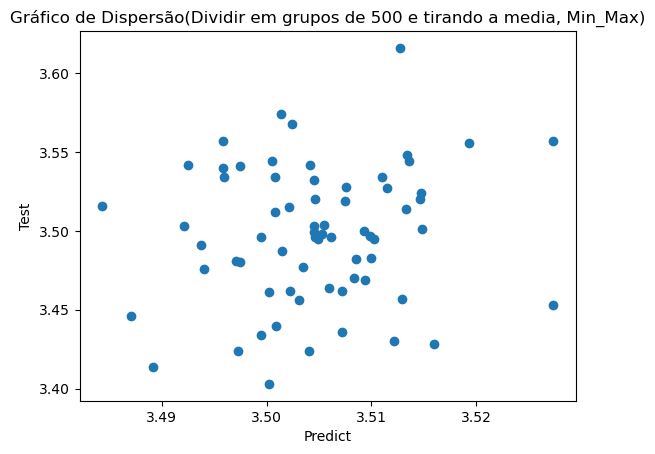

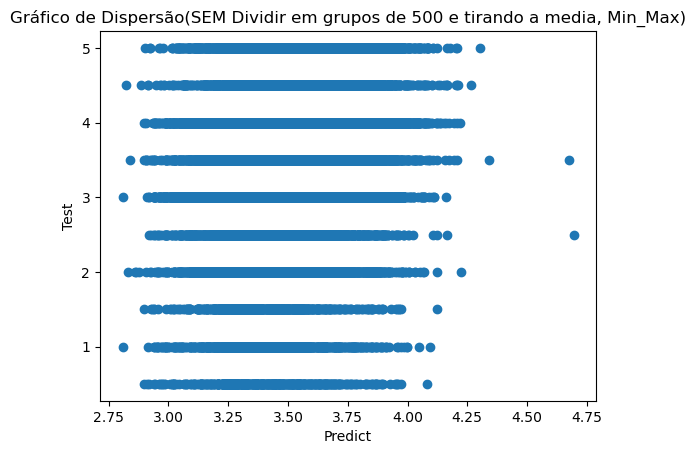

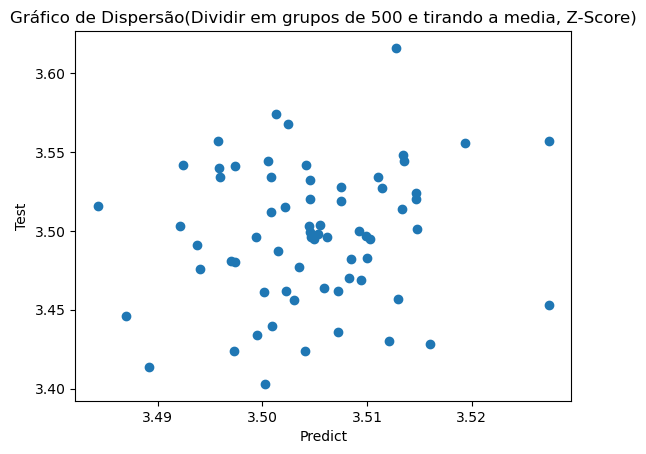

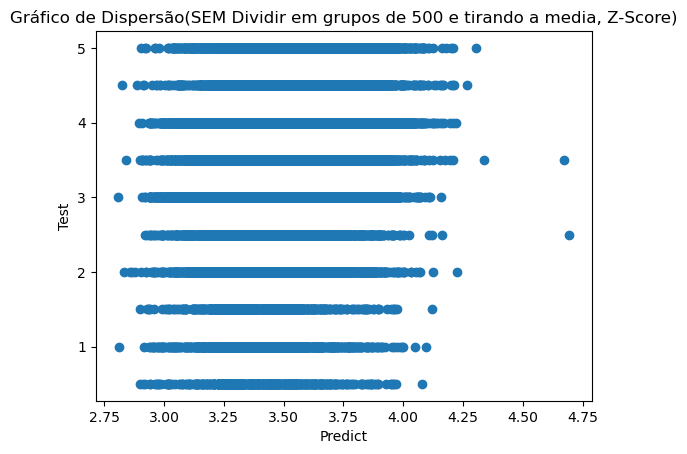

'MSE'

,without-scaler,min-max,z-score
metric,1.052267,1.052267,1.052267


'MAE'

,without-scaler,min-max,z-score
metric,0.815613,0.815613,0.815613


'R2'

,without-scaler,min-max,z-score
metric,0.044572,0.044572,0.044572


In [3]:
dataframe_mse = {}
dataframe_mae = {}
dataframe_r2 = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', LinearRegression())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', LinearRegression())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
        dataframe_r2[key].append(r2)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]
        dataframe_r2[key] = [r2]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
r2_df = pd.DataFrame.from_dict(dataframe_r2, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)
display('R2', r2_df)

### Árvore de Decisão

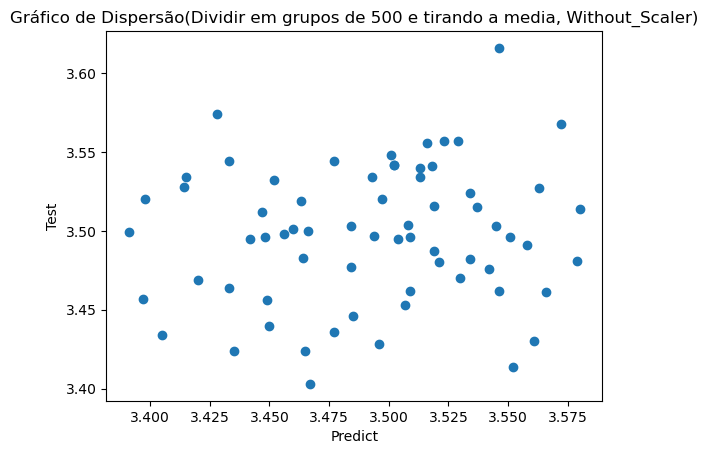

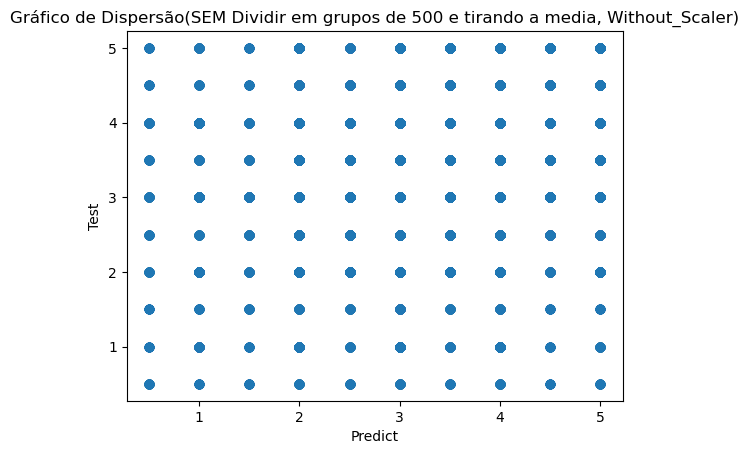

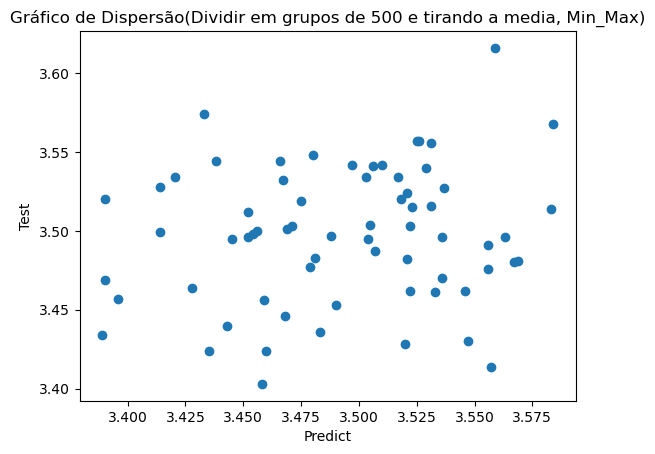

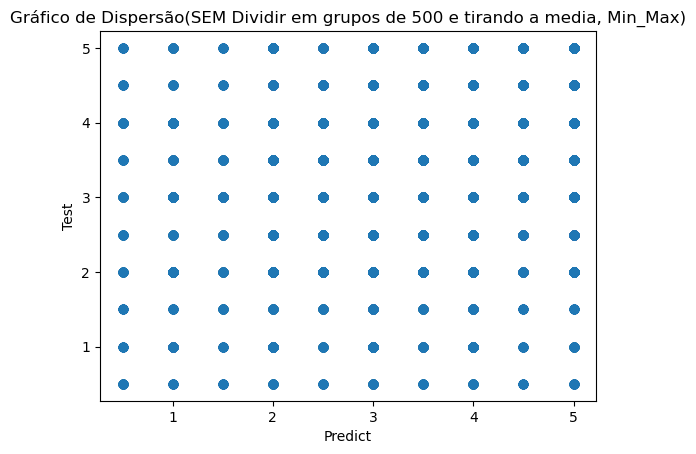

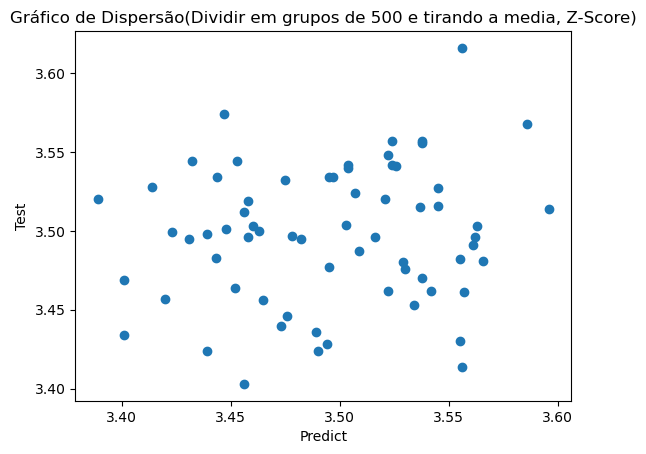

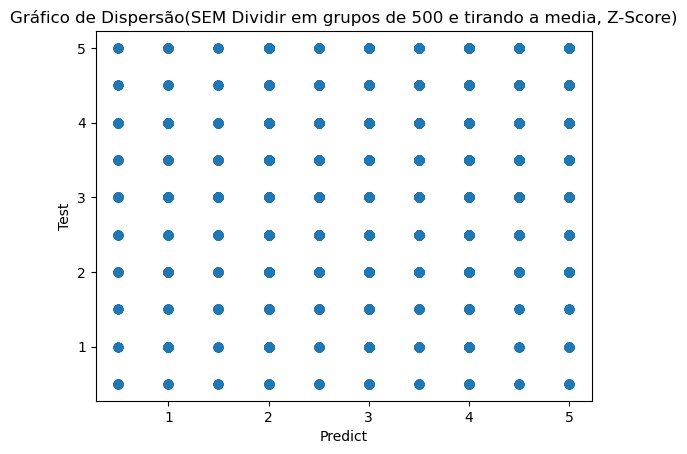

'MSE'

,without-scaler,min-max,z-score
metric,1.633324,1.624534,1.623182


'MAE'

,without-scaler,min-max,z-score
metric,0.952488,0.949603,0.950264


In [4]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', DecisionTreeRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', DecisionTreeRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

### Random Forest

In [5]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', RandomForestRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', RandomForestRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
metric,0.91764,0.917557,0.916763


'MAE'

,without-scaler,min-max,z-score
metric,0.739514,0.739781,0.739172


### Rede Neural MLP

In [6]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', MLPRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', MLPRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
metric,963.571961,1.014493,1.012533


'MAE'

,without-scaler,min-max,z-score
metric,15.576355,0.799681,0.790461


### Comparação entre métodos

In [7]:
dataframe_mse = {}
dataframe_mae = {}

for regressor in regressors:
  for scaler in scalers:
    if(scalers[scaler] == None):
      pipe = Pipeline([('regressor', regressors[regressor])])
    else:
      pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', regressors[regressor])])
      
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)

    if regressor in dataframe_mse:
        dataframe_mse[regressor].append(mse)
        dataframe_mae[regressor].append(mae)
    else:
        dataframe_mse[regressor] = [mse]
        dataframe_mae[regressor] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
knn,1.065359,1.005599,1.007385
decicion_tree,1.632490,1.619531,1.631100
linear_regression,1.052267,1.052267,1.052267
random_forest,0.917721,0.915043,0.916325
neural_network_mlp,672.350995,1.009981,1.019669


'MAE'

,without-scaler,min-max,z-score
knn,0.812795,0.785484,0.785678
decicion_tree,0.952684,0.948371,0.951166
linear_regression,0.815613,0.815613,0.815613
random_forest,0.739229,0.738087,0.738897
neural_network_mlp,12.319011,0.789317,0.790132
